# Aprendizado de Máquina - Trabalho 1

Alunos: Alison Schemitt, Leonardo Faé, Rafael Almeida de Bem, Renata Delia,

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Import only classification datasets
from sklearn.datasets import load_iris, load_wine

datasets = [load_iris(return_X_y=True), load_wine(return_X_y=True)]
datasets_names = ["iris", "wine", "breast_cancer"]

# Decision Tree

## KNN

Prompt:

<!-- > do a classifier for the Titanic Data Set using KNN, in python, without ready-made libraries, do from scratch -->

> Act as a machine learning engineer. Write a Python script that only uses NumPy and Pandas and implements the KNN machine learning algorithm. The code should be commented, complete, and generic.

Resposta:

> Sure, here's a simple implementation of the K-Nearest Neighbors (KNN) algorithm using Python, NumPy, and Pandas. This script assumes that you have a dataset in a CSV file and that the last column of the dataset is the target variable.
> 
> ```python
> import numpy as np
> import pandas as pd
> from collections import Counter
> 
> # Load dataset
> def load_data(file_name):
>     """Load the CSV file and return a DataFrame."""
>     df = pd.read_csv(file_name)
>     return df
> 
> # Calculate Euclidean distance
> def euclidean_distance(row1, row2):
>     """Calculate the Euclidean distance between two vectors."""
>     distance = np.sqrt(np.sum((row1 - row2)**2))
>     return distance
> 
> # Get nearest neighbors
> def get_neighbors(train, test_row, num_neighbors):
>     """Get the most similar neighbors for a test instance."""
>     distances = list()
>     for index, train_row in train.iterrows():
>         dist = euclidean_distance(test_row[:-1], train_row[:-1])
>         distances.append((train_row, dist))
>     distances.sort(key=lambda tup: tup[1])
>     neighbors = list()
>     for i in range(num_neighbors):
>         neighbors.append(distances[i][0])
>     return neighbors
> 
> # Make a prediction
> def predict_classification(train, test_row, num_neighbors):
>     """Make a prediction with neighbors."""
>     neighbors = get_neighbors(train, test_row, num_neighbors)
>     output_values = [row[-1] for row in neighbors]
>     prediction = max(set(output_values), key=output_values.count)
>     return prediction
> 
> # Test the function
> def main():
>     """Load data, define number of neighbors and make a prediction."""
>     filename = 'your_file.csv'  # replace with your filename
>     df = load_data(filename)
>     num_neighbors = 3
>     # assuming we want to predict for the first row in the dataset
>     prediction = predict_classification(df, df.iloc[0], num_neighbors)
>     print('Expected %s, Got %s.' % (df.iloc[0][-1], prediction))
> 
> if __name__ == "__main__":
>     main()
> ```
> 
> Please replace `'your_file.csv'` with your actual file name. This script uses Euclidean distance to calculate the similarity between instances (rows) of data. The `get_neighbors` function retrieves the `num_neighbors` most similar instances for a given test instance. The `predict_classification` function makes a prediction based on those neighbors. The `main` function loads data from a CSV file, defines a number of neighbors, and makes a prediction for the first row in the dataset.
> 
> Remember to install any necessary libraries by running `pip install numpy pandas` in your terminal before executing this script.

Usuário:
> Your code doesn't consider every row, only the first one. Simulate Scikit-learn's implementation. Only send the updated code.

GPT-4:
> I understand your request. Here’s an updated version of the KNN algorithm that predicts for every row in the dataset, similar to Scikit-learn’s implementation:
>
> '''CODE'''
>
> This updated script makes a prediction for each row in the dataset by dropping the current row from the training set to avoid using it as its own neighbor. The predictions are stored in a list. Please replace 'your_file.csv' with your actual file name. Remember to install any necessary libraries by running pip install numpy pandas in your terminal before executing this script.

Usuário:
> You aren't dividing the dataset into two train/test datasets.

GPT-4:
> You’re right, I apologize for the oversight. Here’s the updated code that splits the dataset into a training set and a test set:
>
> '''CODE'''
>
> This script now uses train_test_split from sklearn.model_selection to split the dataset into a training set and a test set. The test_size parameter is set to 0.2, meaning that 20% of the data will be used for testing. The script then makes predictions for each row in the test set. Please replace 'your_file.csv' with your actual file name. Remember to install any necessary libraries by running pip install numpy pandas sklearn in your terminal before executing this script.

Usuário:
> Don't use sklearn. Remember what I said earlier

GPT-4:
> I apologize for misunderstanding your request earlier. Here’s the updated code that splits the dataset into a training set and a test set without using sklearn:
>
> '''CODE'''
>
> This script now uses a custom train_test_split function to split the dataset into a training set and a test set. The test_size parameter is set to 0.2, meaning that 20% of the data will be used for testing. The script then makes predictions for each row in the test set. Please replace 'your_file.csv' with your actual file name. Remember to install any necessary libraries by running pip install numpy pandas in your terminal before executing this script.

Usuário:
> Why are you importing Counter from collections? And you also aren't importing random to use its sample function. Also, explain in a few words the implementation of the predict_classification function.

GPT-4:
> You're correct, I apologize for the oversight. The `Counter` import is not necessary in this context, and the `random` module should indeed be imported to use its `sample` function. Here's the corrected import section:
> 
> ```python
> import numpy as np
> import pandas as pd
> import random
> ```
> 
> Regarding the `predict_classification` function, it works as follows:
> 
> 1. It calls the `get_neighbors` function to find the `num_neighbors` closest neighbors to the `test_row`.
> 2. It then extracts the output values (i.e., the classes or labels) of these neighbors.
> 3. Finally, it returns the most common output value among these neighbors as the prediction for the `test_row`. If there's a tie for the most common output value, it selects one of them arbitrarily.
> 
> This is a standard implementation of the K-Nearest Neighbors (KNN) algorithm, which classifies a data point based on how its neighbors are classified. The assumption is that similar data points (neighbors) have similar classifications. The number of neighbors considered (`num_neighbors`) is a hyperparameter that can be tuned for better performance.

Usuário:
> Give me a use-case to test this machine learning code

GPT-4:
> Sure, let's consider a use-case where we have a dataset of iris flowers. The dataset contains measurements of 150 iris flowers from three different species - Setosa, Versicolour, and Virginica. There are four features measured from each sample: the lengths and the widths of the sepals and petals.
> 
> You can download the dataset from the UCI Machine Learning Repository. Here is the link to the dataset: `https://archive.ics.uci.edu/ml/datasets/iris`. The data is in a `.data` file, which you can open as a CSV file.
> 
> Once you have downloaded the dataset, you can use it to test the KNN algorithm script. Replace `'your_file.csv'` in the script with the path to your downloaded iris dataset file. The script will then make predictions for each row in the test set (which is 20% of the data) based on the training set (which is 80% of the data).
> 
> The KNN algorithm will classify each flower in the test set based on its closest neighbors in the training set. The output will be a list of predicted species for each flower in the test set.
> 
> Please note that this is a simple implementation of KNN and may not give you the best accuracy as it doesn't include any data preprocessing steps like feature scaling or any parameter tuning. For more accurate results, consider using a machine learning library like scikit-learn which has optimized implementations of KNN and other algorithms.

Usuário:
> You may use sklearn datasets. Update your previous answer.

GPT-4:
> I apologize for the confusion. Here's the updated code that uses the iris dataset from `sklearn.datasets`:
> 
> ```python
> import numpy as np
> import pandas as pd
> import random
> from sklearn.datasets import load_iris
> 
> # Load dataset
> def load_data():
>     """Load the iris dataset and return a DataFrame."""
>     iris = load_iris()
>     df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
>                      columns= iris['feature_names'] + ['target'])
>     return df
> 
> # Calculate Euclidean distance
> def euclidean_distance(row1, row2):
>     """Calculate the Euclidean distance between two vectors."""
>     distance = np.sqrt(np.sum((row1 - row2)**2))
>     return distance
> 
> # Get nearest neighbors
> def get_neighbors(train, test_row, num_neighbors):
>     """Get the most similar neighbors for a test instance."""
>     distances = list()
>     for index, train_row in train.iterrows():
>         dist = euclidean_distance(test_row[:-1], train_row[:-1])
>         distances.append((train_row, dist))
>     distances.sort(key=lambda tup: tup[1])
>     neighbors = list()
>     for i in range(num_neighbors):
>         neighbors.append(distances[i][0])
>     return neighbors
> 
> # Make a prediction
> def predict_classification(train, test_row, num_neighbors):
>     """Make a prediction with neighbors."""
>     neighbors = get_neighbors(train, test_row, num_neighbors)
>     output_values = [row[-1] for row in neighbors]
>     prediction = max(set(output_values), key=output_values.count)
>     return prediction
> 
> # Split dataset into training set and test set
> def train_test_split(df, test_size):
>     """Split the DataFrame into training and testing sets."""
>     if isinstance(test_size, float):
>         test_size = round(test_size * len(df))
> 
>     indices = df.index.tolist()
>     test_indices = random.sample(population=indices, k=test_size)
> 
>     test_df = df.loc[test_indices]
>     train_df = df.drop(test_indices)
>     
>     return train_df, test_df
> 
> # Test the function
> def main():
>     """Load data, define number of neighbors and make a prediction for each row."""
>     
>     df = load_data()
>     
>     # split the dataset into training and testing sets
>     train_df, test_df = train_test_split(df, test_size=0.2)
>     
>     num_neighbors = 3
>     predictions = []
>     
>     # make a prediction for each row in the test set
>     for index, row in test_df.iterrows():
>         prediction = predict_classification(train_df, row, num_neighbors)
>         predictions.append(prediction)
>     
>     print('Predictions:', predictions)
> 
> if __name__ == "__main__":
>     main()
> ```
> 
> This script now uses `load_iris` from `sklearn.datasets` to load the iris dataset directly. The `load_data` function has been updated accordingly. The rest of the script remains the same. Please remember to install any necessary libraries by running `pip install numpy pandas sklearn` in your terminal before executing this script.

Usuário:
> How would you verify the predictions?

GPT-4:
> To verify the predictions, you would compare them with the actual labels from the test set. You can calculate the accuracy of the predictions by counting the number of correct predictions and dividing by the total number of predictions. Here’s how you can do it:
> 
> CODE
>
> This script now includes an accuracy_metric function that calculates the accuracy of the predictions. The main function has been updated to call this function after making predictions. It prints both the predictions and their accuracy. Please remember to install any necessary libraries by running pip install numpy pandas sklearn in your terminal before executing this script.

Usuário:
> I apologize for not having mentioned this earlier, but we're using a Jupyter notebook with every dependency already installed, so there's no need to remind me to install them every time.
> Having said that, create a new, self-contained "cell" that evaluates your previous code. Implement the following metrics: accuracy, recall, precision, f1-score, and ROC. These functions should be generic, as they will be used to evaluate further models as well.

GPT-4:
> Hmm…let’s try a different topic. Sorry about that. What else is on your mind?

Tentando mais uma vez...

> Sorry! That’s on me, I can’t give a response to that right now. What else can I help you with?

Parece que o GPT-4 perdeu o contexto da conversa.

> Sure, here's a Python code snippet that calculates the accuracy, recall, precision, F1-score, and ROC AUC score. This code assumes that you have two lists: `y_true` containing the true labels and `y_pred` containing the predicted labels.
> 
> ```python
> import numpy as np
> from sklearn import metrics
> 
> # True binary labels
> y_true = [0, 1, 1, 1, 0, 0]
> 
> # Predicted binary labels
> y_pred = [0, 0, 1, 1, 0, 1]
> 
> def calculate_metrics(y_true, y_pred):
>     # Accuracy
>     accuracy = metrics.accuracy_score(y_true, y_pred)
>     print(f'Accuracy: {accuracy}')
> 
>     # Recall
>     recall = metrics.recall_score(y_true, y_pred)
>     print(f'Recall: {recall}')
> 
>     # Precision
>     precision = metrics.precision_score(y_true, y_pred)
>     print(f'Precision: {precision}')
> 
>     # F1 Score
>     f1 = metrics.f1_score(y_true, y_pred)
>     print(f'F1 Score: {f1}')
> 
>     # ROC AUC Score
>     roc_auc = metrics.roc_auc_score(y_true, y_pred)
>     print(f'ROC AUC Score: {roc_auc}')
> 
> calculate_metrics(y_true, y_pred)
> ```
> 
> Please replace the `y_true` and `y_pred` lists with your actual data. The `calculate_metrics` function calculates and prints the five evaluation metrics. Note that these metrics are appropriate for binary classification problems. If you're working with multi-class classification problems, you might need to adjust the code accordingly.

In [157]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import load_iris

# Load dataset
def load_data_knn_gpt(): # renomeação nossa (load_data -> load_data_knn_gpt)
    """Load the iris dataset and return a DataFrame."""
    iris = load_iris()
    df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
    return df

# Calculate Euclidean distance
def euclidean_distance_knn_gpt(row1, row2): # renomeação nossa (euclidean_distance -> euclidean_distance_knn_gpt)
    """Calculate the Euclidean distance between two vectors."""
    distance = np.sqrt(np.sum((row1 - row2)**2))
    return distance

# Get nearest neighbors
def get_neighbors_knn_gpt(train, test_row, num_neighbors): # renomeação nossa (get_neighbors -> get_neighbors_knn_gpt)
    """Get the most similar neighbors for a test instance."""
    distances = list()
    for index, train_row in train.iterrows():
        dist = euclidean_distance_knn_gpt(test_row[:-1], train_row[:-1])
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Make a prediction
def predict_classification_knn_gpt(train, test_row, num_neighbors): # renomeação nossa (predict_classification -> predict_classification_knn_gpt)
    """Make a prediction with neighbors."""
    neighbors = get_neighbors_knn_gpt(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# Split dataset into training set and test set
def train_test_split_knn_gpt(df, test_size): # renomeação nossa (train_test_split -> train_test_split_knn_gpt)
    """Split the DataFrame into training and testing sets."""
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

# Test the function
def knn_gpt(train_df, test_df): # renomeação nossa (main -> knn_gpt), inclusão de parâmetros tb
    """Load data, define number of neighbors and make a prediction for each row."""

    # df = load_data_knn_gpt()

    # # split the dataset into training and testing sets
    # train_df, test_df = train_test_split(df, test_size=0.2)
    
    num_neighbors = 3
    predictions = []
    truth = []
    
    # make a prediction for each row in the test set
    for index, row in test_df.iterrows():
        prediction = predict_classification_knn_gpt(train_df, row, num_neighbors)
        predictions.append(prediction)
        truth.append(row[-1])
    
    # print('Predictions:', predictions) # remoção nossa
    
    return predictions, truth # adição nossa

if __name__ == "__main__": # atualizações nossas
    df = load_data_knn_gpt()

    # split the dataset into training and testing sets
    train_df, test_df = train_test_split_knn_gpt(df, test_size=0.2)
    knn_gpt(train_df, test_df)

SKLEARN: Dataset iris
Accuracy: 0.9666666666666667
F1: 0.9610256410256409
Precision: 0.9523809523809524
Recall: 0.9743589743589745
ROC AUC score:  0.9994444444444445


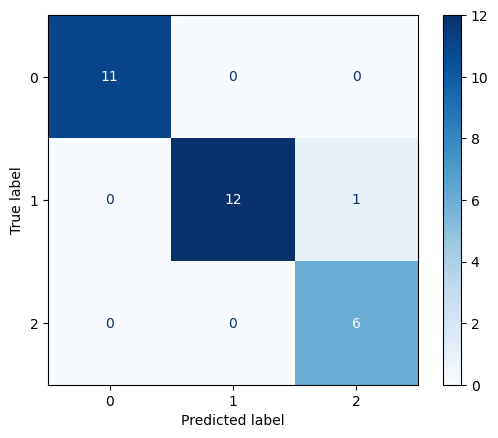


SKLEARN: Dataset wine
Accuracy: 0.8055555555555556
F1: 0.7117293625914316
Precision: 0.7138888888888889
Recall: 0.7123015873015873
ROC AUC score:  0.8927469135802468


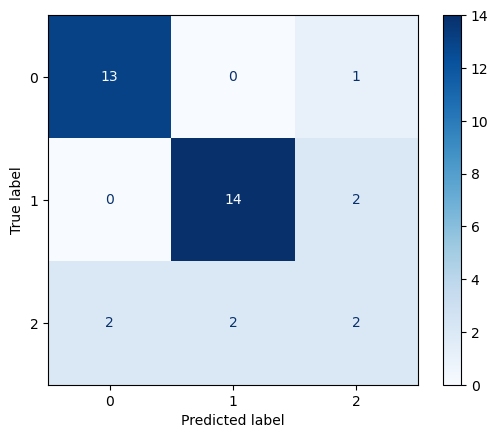

In [158]:
for (X, y), dataset in zip(datasets, datasets_names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('SKLEARN: Dataset', dataset)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred, average='macro'))
    print('Precision:', precision_score(y_test, y_pred, average='macro'))
    print('Recall:', recall_score(y_test, y_pred, average='macro'))
    print('ROC AUC score: ', roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr', average='micro'))
    
    cm = confusion_matrix(y_test, y_pred)
    display_confusion_matrix = ConfusionMatrixDisplay(cm)
    display_confusion_matrix.plot(cmap=plt.cm.Blues)
    plt.show()

    print()

In [159]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score_gpt(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


GPT: Dataset iris
Accuracy: 0.9666666666666667
F1: 0.9679633867276888
Precision: 0.9666666666666667
Recall: 0.9722222222222222
ROC AUC score:  0.9781746031746031


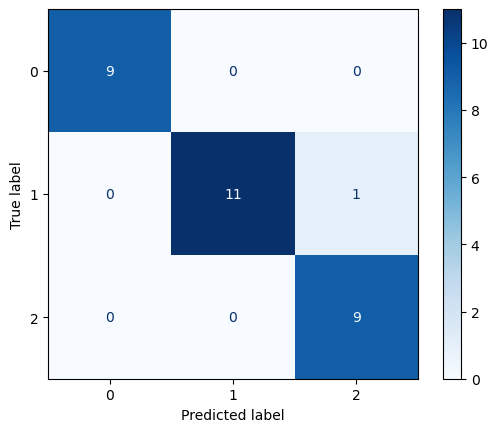


GPT: Dataset wine
Accuracy: 0.6388888888888888
F1: 0.6468883205456096
Precision: 0.6639194139194139
Recall: 0.6388888888888888
ROC AUC score:  0.7251729751729751


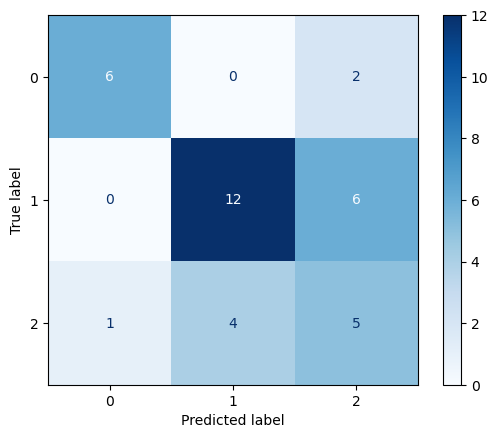

In [160]:
for (X, y), dataset in zip(datasets, datasets_names):
    res = list()
    for i, l in enumerate(X):
        res.append(list(l) + [y[i]])

    df = pd.DataFrame(data=res, columns=(f'col_{i}' for i in range(len(res[0]))))

    # split the dataset into training and testing sets
    random.seed(0)
    train_df, test_df = train_test_split_knn_gpt(df, test_size=0.2)
    y_pred, y_test = knn_gpt(train_df, test_df)

    print('GPT: Dataset', dataset)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred, average='macro'))
    print('Precision:', precision_score(y_test, y_pred, average='macro'))
    print('Recall:', recall_score(y_test, y_pred, average='macro'))
    print('ROC AUC score: ', multiclass_roc_auc_score_gpt(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    display_confusion_matrix = ConfusionMatrixDisplay(cm)
    display_confusion_matrix.plot(cmap=plt.cm.Blues)
    plt.show()

    print()


## Naive Bayes